In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
myloan = pd.read_csv("/content/drive/MyDrive/Loan payments data.csv")
myloan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [9]:
myloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [4]:
myloan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [5]:
myloan.shape

(500, 11)

In [6]:
myloan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
sns.set(style="whitegrid")

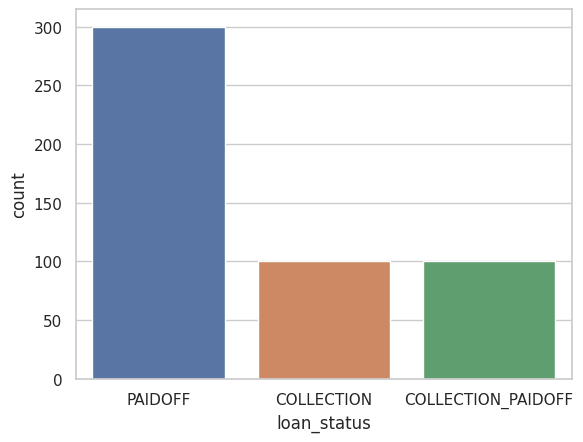

In [15]:
#graph of how many loan cases are paidoff,collection or collection_paidoff status
graph1 = sns.countplot(x="loan_status",data=myloan)


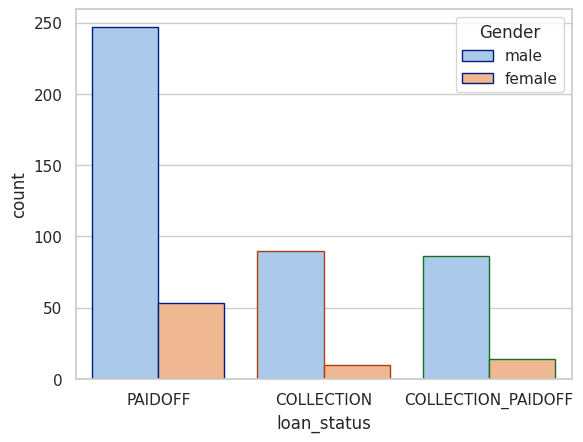

In [28]:
graph2 = sns.countplot(x="loan_status",data=myloan,hue="Gender",
                       palette="pastel",edgecolor=sns.color_palette("dark",5))

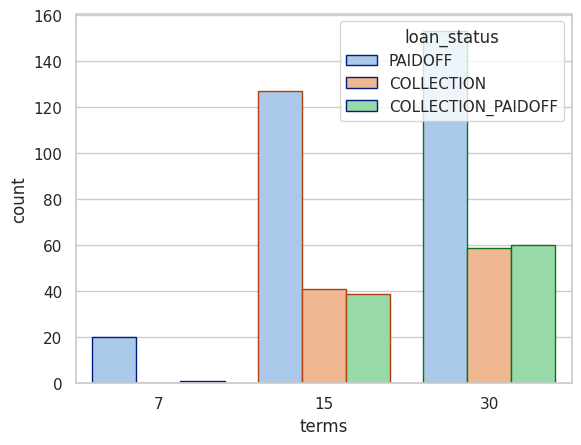

In [30]:
graph3 = sns.countplot(x="terms",data=myloan,hue="loan_status",palette="pastel",edgecolor=sns.color_palette("dark",3))

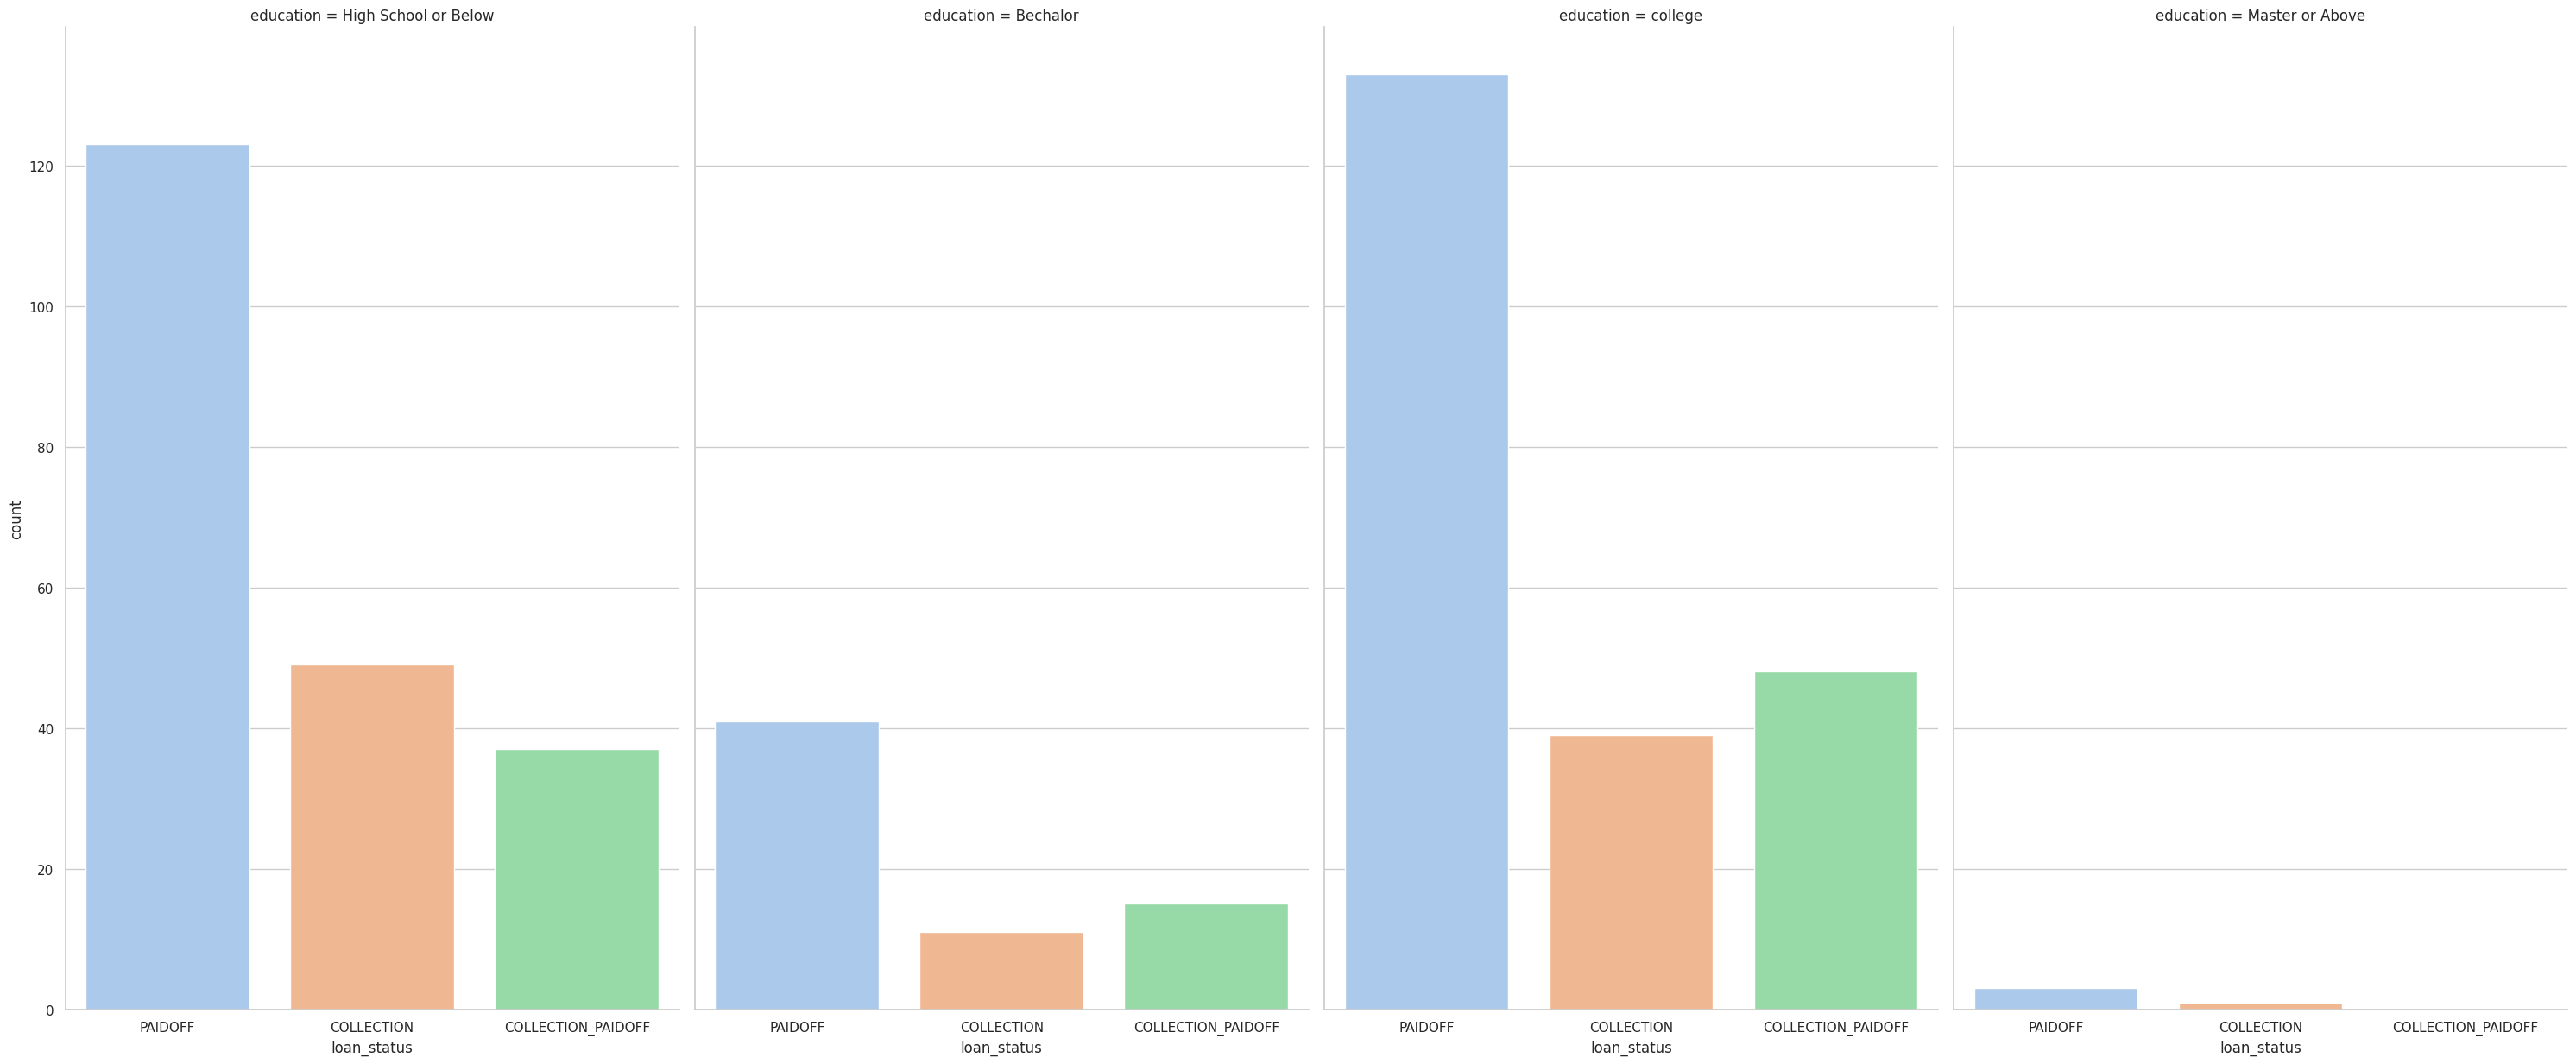

In [31]:
graph4  = sns.catplot(x = "loan_status", col="education", col_wrap=4,
                 data=myloan[myloan["loan_status"].notnull()],
                 kind="count", height=12.5, aspect=.6,palette="pastel")

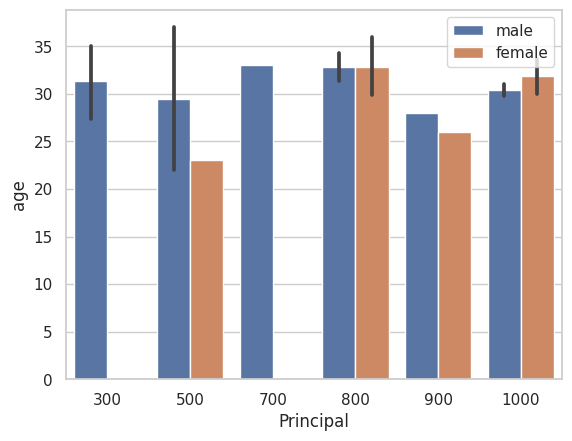

In [25]:
graph5 = sns.barplot(x="Principal",y="age",hue="Gender",data = myloan)
graph5.legend(loc="upper right")

<Figure size 2500x500 with 0 Axes>

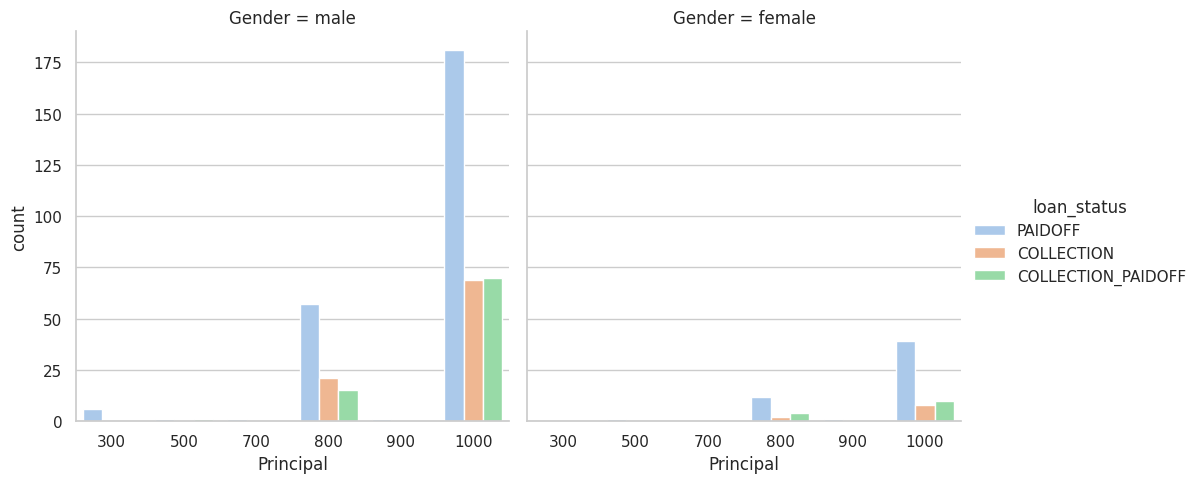

In [32]:
fig = plt.figure(figsize=(25,5))
graph6 = sns.catplot(x="Principal",hue="loan_status",col = "Gender"
                   ,palette = "pastel",data=myloan,kind="count")

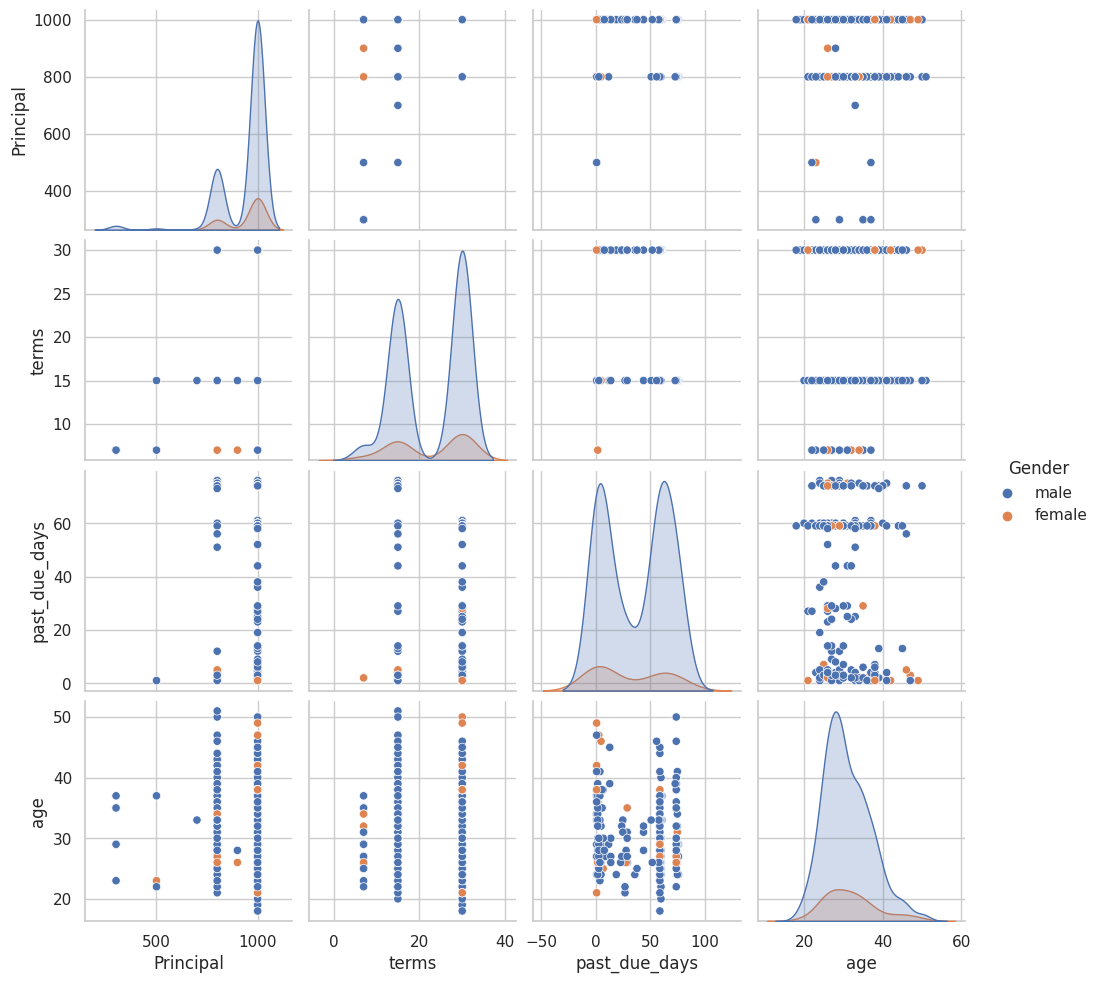

In [33]:
sns.pairplot(myloan,hue="Gender")

<Axes: xlabel='Principal', ylabel='terms'>

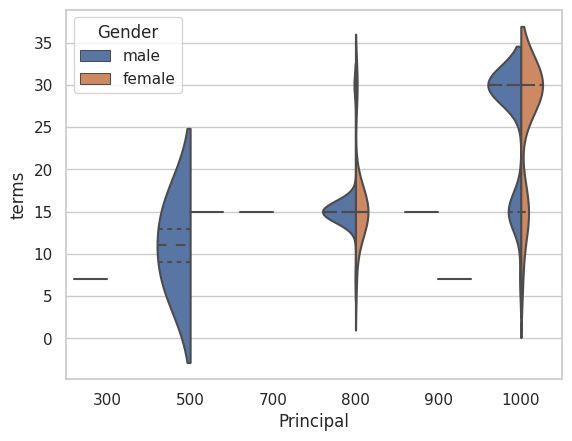

In [36]:
sns.violinplot(x="Principal",y = "terms",hue = "Gender",
               split=True,inner="quart",data = myloan)

In [44]:
t = myloan.shape[0]-myloan["past_due_days"].isnull().sum()
print(t)

200


In [39]:
defaultPerc = ((myloan.shape[0]-myloan["past_due_days"].isnull().sum())/myloan.shape[0])*100
print(defaultPerc,"% of people paid after time")

40.0 % of people paid after time


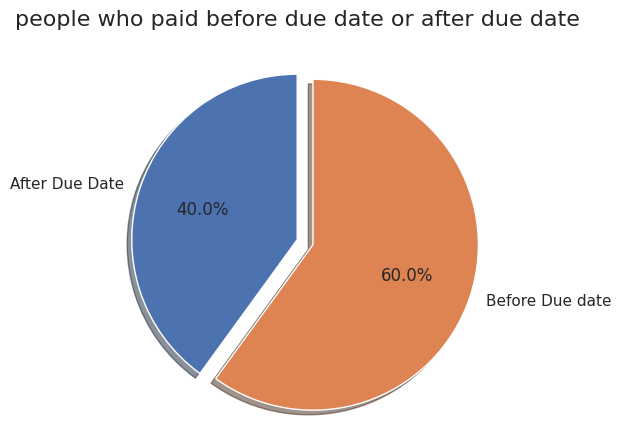

In [47]:
labels ="After Due Date" , "Before Due date"
sizes = [defaultPerc,100-defaultPerc]
explode = (0,0.1)
fig,ax = plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
ax.axis("equal")
fig.suptitle("people who paid before due date or after due date",fontsize=16)
plt.show()